# Data Exploration

Our first step is to perform an exploratory data analysis to understand the charateristics of dataset. Here are some quesitons we will try to adress:

- What are the dimensions of the data?
- How do predictors relate to each other?
- What are the classes of the data?
- How are the predictors distributed?
- How are the labels distributed?
- Do we have missing values?
- Are outliers are relevant?
- Are there any transformations that must be done with the dataset?

In [52]:
# import dependances
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palette
import warnings


# Ignore all warnings
warnings.filterwarnings("ignore")


In [61]:
# read in data
file_path = 'data_files/ML_dataset.csv' # REPLACE WITH FINAL DATABASE

df = pd.read_csv(file_path)

df.head()


,industry,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,...,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema,label
0,Consumer Discretionary,-0.019,0.043,-0.010,-0.008,6230100.000,6996900.000,6377700.000,7026700.000,30.010,...,14.400,13.740,0.025,241.428,0.400,5.000,56.240,8.149,56.300,0
1,Utilities,0.026,0.012,-0.007,0.031,175800.000,195300.000,233900.000,221400.000,17.580,...,11.150,1.490,0.013,238.132,0.360,5.000,73.803,87.797,73.715,0
2,Real Estate,0.057,-0.004,-0.041,0.037,1298900.000,3493600.000,571100.000,832500.000,62.130,...,12.970,29.980,0.019,237.838,0.130,5.000,23.197,88.261,23.241,0
3,Industrials,-0.045,0.063,0.055,-0.058,1071300.000,880100.000,1080400.000,994800.000,6.680,...,27.430,-18.140,0.024,305.691,5.080,3.500,235.737,11.038,235.241,0
4,Consumer Staples,0.023,-0.022,0.022,-0.028,6563300.000,6745100.000,9474700.000,10172500.000,10.280,...,4.550,10.210,0.020,259.101,0.100,10.200,63.633,72.449,63.837,1


In [62]:
# display the dimensions
print("The stock dataset has", df.shape[0], "records, each with", df.shape[1],
    "attributes")

The stock dataset has 1914 records, each with 23 attributes


### The stock dataset has 1914 records, each with 23 attributes


In [63]:
# display the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   industry                  1914 non-null   object 
 1   wr1                       1914 non-null   float64
 2   wr2                       1914 non-null   float64
 3   wr3                       1914 non-null   float64
 4   wr4                       1914 non-null   float64
 5   vol1                      1914 non-null   float64
 6   vol2                      1914 non-null   float64
 7   vol3                      1914 non-null   float64
 8   vol4                      1914 non-null   float64
 9   pe_ratio                  1914 non-null   float64
 10  debt_to_equity            1914 non-null   float64
 11  quick_ratio               1914 non-null   float64
 12  total_shareholder_return  1914 non-null   float64
 13  profit_margin             1914 non-null   float64
 14  free_cas

There are 23 columns, of which all except the industry is numberical data. The label is a binary classifier or value 0 or 1. 

## Feature Details

- **industry**: A categorical value, representing the sector that the company is in.
#### Weekly Returns:
- **wr1**: Weekly Return (1), a float value that is the the weekly return of the week prior to the selected date.
- **wr2**: Weekly Return (2), a float value that is the weekly return of the week two weeks prior to the selected date.
- **wr3**: Weekly Return (3), a float value that is the weekly teturn of the week three weeks prior to the selected date.
- **wr4**: Weekly Return (4), a float value that is the weekly teturn of the week four weeks prior to the selected date.
#### Trading Volumes
- **vol1**: Trading Volumne (1), a float value that is the trading volume on the selected date.
- **vol2**: Trading Volumne (2), a float value that is the trading volume on the day before the selected date.
- **vol3**: Trading Volumne (3), a float value that is the trading volume two days before selected date.
- **vol4**: Trading Volumne (4), a float value that is the trading volume three days before the selected date.
#### Financial Ratios
- **pe_ratio**: The price–earnings ratio, a float value, is the ratio of a company's share price to the company's earnings per share.
- **debt_to_equity**: The debt-to-equity ratio indicates the relative proportion of shareholders' equity and debt used to finance a company's assets. A float value.
- **quick_ratio**: The quick ratio, a float value, is the ratio of cash, marketable securities, and accounts receivable by the current liabilities.
- **total_shareholder_return**: Total Shareholder Return is a financial metric that represents the total value received by a shareholder through capital appreciation and any dividends or distributions received over a specific period.  This is a float value and is represented in % units.
- **profit_margin**: Profit margin is a financial metric that expresses the percentage of a company's net income relative to its total revenue. This is a float value and is represented in % units.
- **free_cash_margin**: Free cash flow margin is a financial metric that measures the percentage of a company's total revenue that translates into free cash flow after accounting for operating expenses and capital expenditures. This is a float value and is represented in % units.
#### Risk
- **volatility**: Stock volatility, measured by standard deviation, is a statistical metric that quantifies the degree of variation of a trading price series for a given security over a specific period. This float value represents historical volatlity of the stock from its origin to the selected date.
#### Economic Indicators
- **cpi**: The Consumer Price Index is a measure that examines the average change in prices paid by consumers for a basket of goods and services over time. It is a widely used indicator for inflation. This float value represents the CPI in %, for the month and year of the selected date. 
- **interest_rate**: The interest rate in this model is the The federal funds rate, the rate at which depository institutions (banks and credit unions) lend reserve balances to each other overnight. It is a float value represented in %, for the selected date.
- **unemployment rate**: The unemployment rate for the month and year of the selected date. This is a float value in %.
#### Technical Indicators
- **sma**: Simple Moving Average represents the average of a set of prices over a specified period, with the goal of smoothing out short-term price fluctuations to identify trends. It is a float value.
- **ema**: The Exponential Moving Average is a type of weighted moving average that gives more weight to recent prices. It is a float value.
- **rsi**: The Relative Strength Index is a momentum oscillator that measures the speed and change of price movements. It is a float value.
#### Label / Classifier
- **label**: This is our y or predicted value. It is a binary classifier. We compare the price of the selected date to the next trading date and give the row a value of 1 if the price stayed the same or increased and a value of 0 if the price decreased. In essence, we are using multiple financial and economic features to try to predict short term price changes. 





In [66]:
# display the dimensions
print("The stock dataset has", df.shape[0], "records, each with", df.shape[1],
    "attributes")

The stock dataset has 1914 records, each with 23 attributes


## Analyze labels

We are working with a binary label where 1 means the price increased or stayed the same the next day and 0 means the price decreased the next day.

In [67]:
df.label.value_counts()

label
1    1012
0     902
Name: count, dtype: int64

### We can see that the database is quite balanced with a fairly proportionate split between label 1 and 0. No need to over-sample.

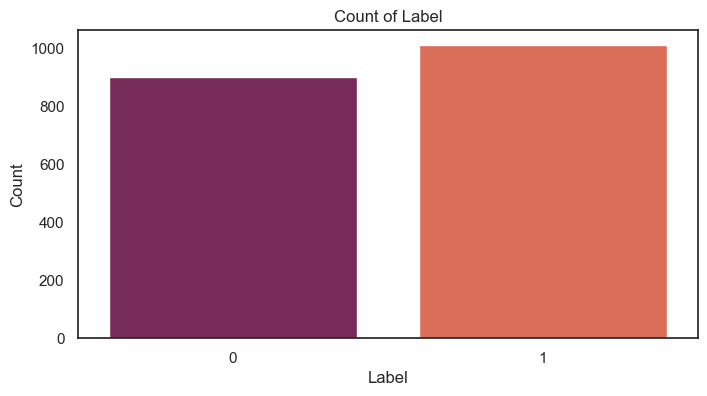

In [68]:
# plot label distribution

sns.set(style="white")


# Create a bar chart using seaborn with 'rocket' color palette
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='label', data=df, palette='rocket')
ax.set_title("Count of Label")
ax.set_xlabel("Label")
ax.set_ylabel("Count")

# Show the plot
plt.show()


## Descriptive Statistics

Now we will use statistical tools, especially from pandas to improve the understanding from the dataset, especially the numerical features. We have seen there are 25 numerical columns in the dataset, all of each are financial indicators from the companies. The function describe() returns information about the distribution of the data such as quantiles, min and max.

In [69]:
# statistical summary
df.describe()

,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,debt_to_equity,...,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema,label
count,1914.000,1914.000,1914.000,1914.000,1914.000,1914.000,1914.000,1914.000,1914.000,1914.000,...,1914.000,1914.000,1914.000,1914.000,1914.000,1914.000,1914.000,1914.000,1914.000,1914.000
mean,0.003,0.002,0.005,0.001,5244499.168,5245240.041,5282077.767,5248485.158,19.186,0.041,...,49.432,-18.661,0.026,263.160,1.379,4.823,109.891,52.402,109.907,0.529
std,0.052,0.050,0.050,0.049,17142983.202,17331063.529,17581353.940,15695307.657,318.130,56.042,...,2007.174,671.106,0.021,22.107,1.555,1.965,144.432,28.848,144.301,0.499
min,-0.449,-0.407,-0.396,-0.417,11749.000,21082.000,12129.000,16100.000,-9034.010,-2232.640,...,-25974.770,-19979.040,0.012,233.707,0.040,3.400,0.278,0.000,0.286,0.000
25%,-0.020,-0.020,-0.019,-0.022,807825.000,777825.000,786925.000,775600.000,12.357,0.350,...,3.580,1.438,0.019,244.955,0.100,3.700,41.269,29.234,41.349,0.000
50%,0.002,0.002,0.005,0.002,1703000.000,1724800.000,1724400.000,1732850.000,21.495,0.770,...,9.580,10.815,0.023,256.759,0.830,4.200,70.655,53.394,70.774,1.000
75%,0.026,0.025,0.028,0.025,4152300.000,4284525.000,4151625.000,4278925.000,31.475,1.480,...,16.760,20.858,0.030,277.948,2.180,5.100,129.931,76.170,130.356,1.000
max,0.378,0.379,0.380,0.461,404870000.000,397250400.000,496554400.000,307893000.000,3088.640,554.680,...,59755.090,598.140,0.378,307.789,5.330,14.700,2699.457,100.000,2676.807,1.000


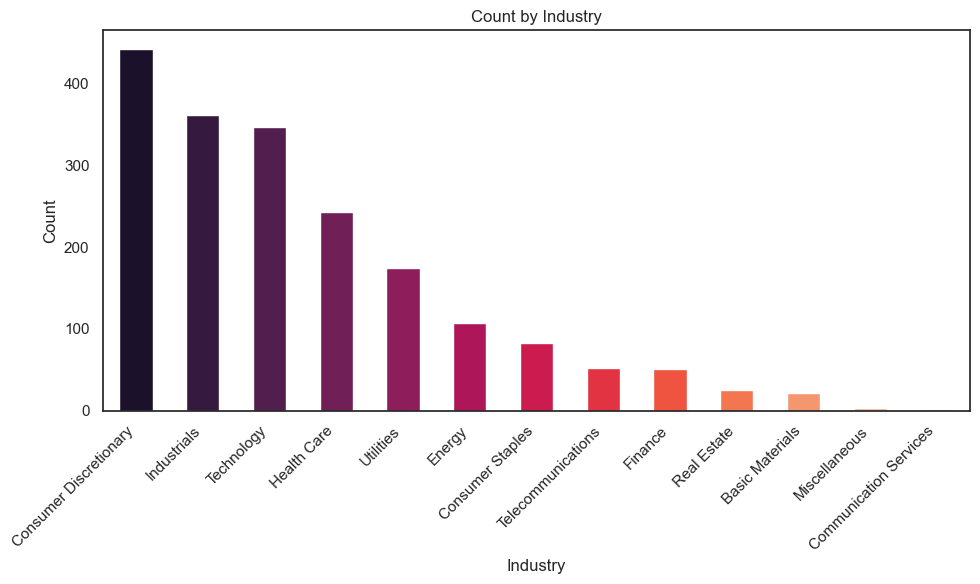

In [70]:
# Count the occurrences of each industry
industry_counts = df['industry'].value_counts()

# Sort the counts in descending order
industry_counts = industry_counts.sort_values(ascending=False)

# Define a color palette with as many colors as there are unique industries
colors = sns.color_palette('rocket', len(industry_counts))

# Plot the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color=colors)
plt.title('Count by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

### Outliers and Correlations

We're going to look at the distrubition of the features to look for any egregious outliers that might make our data noisy

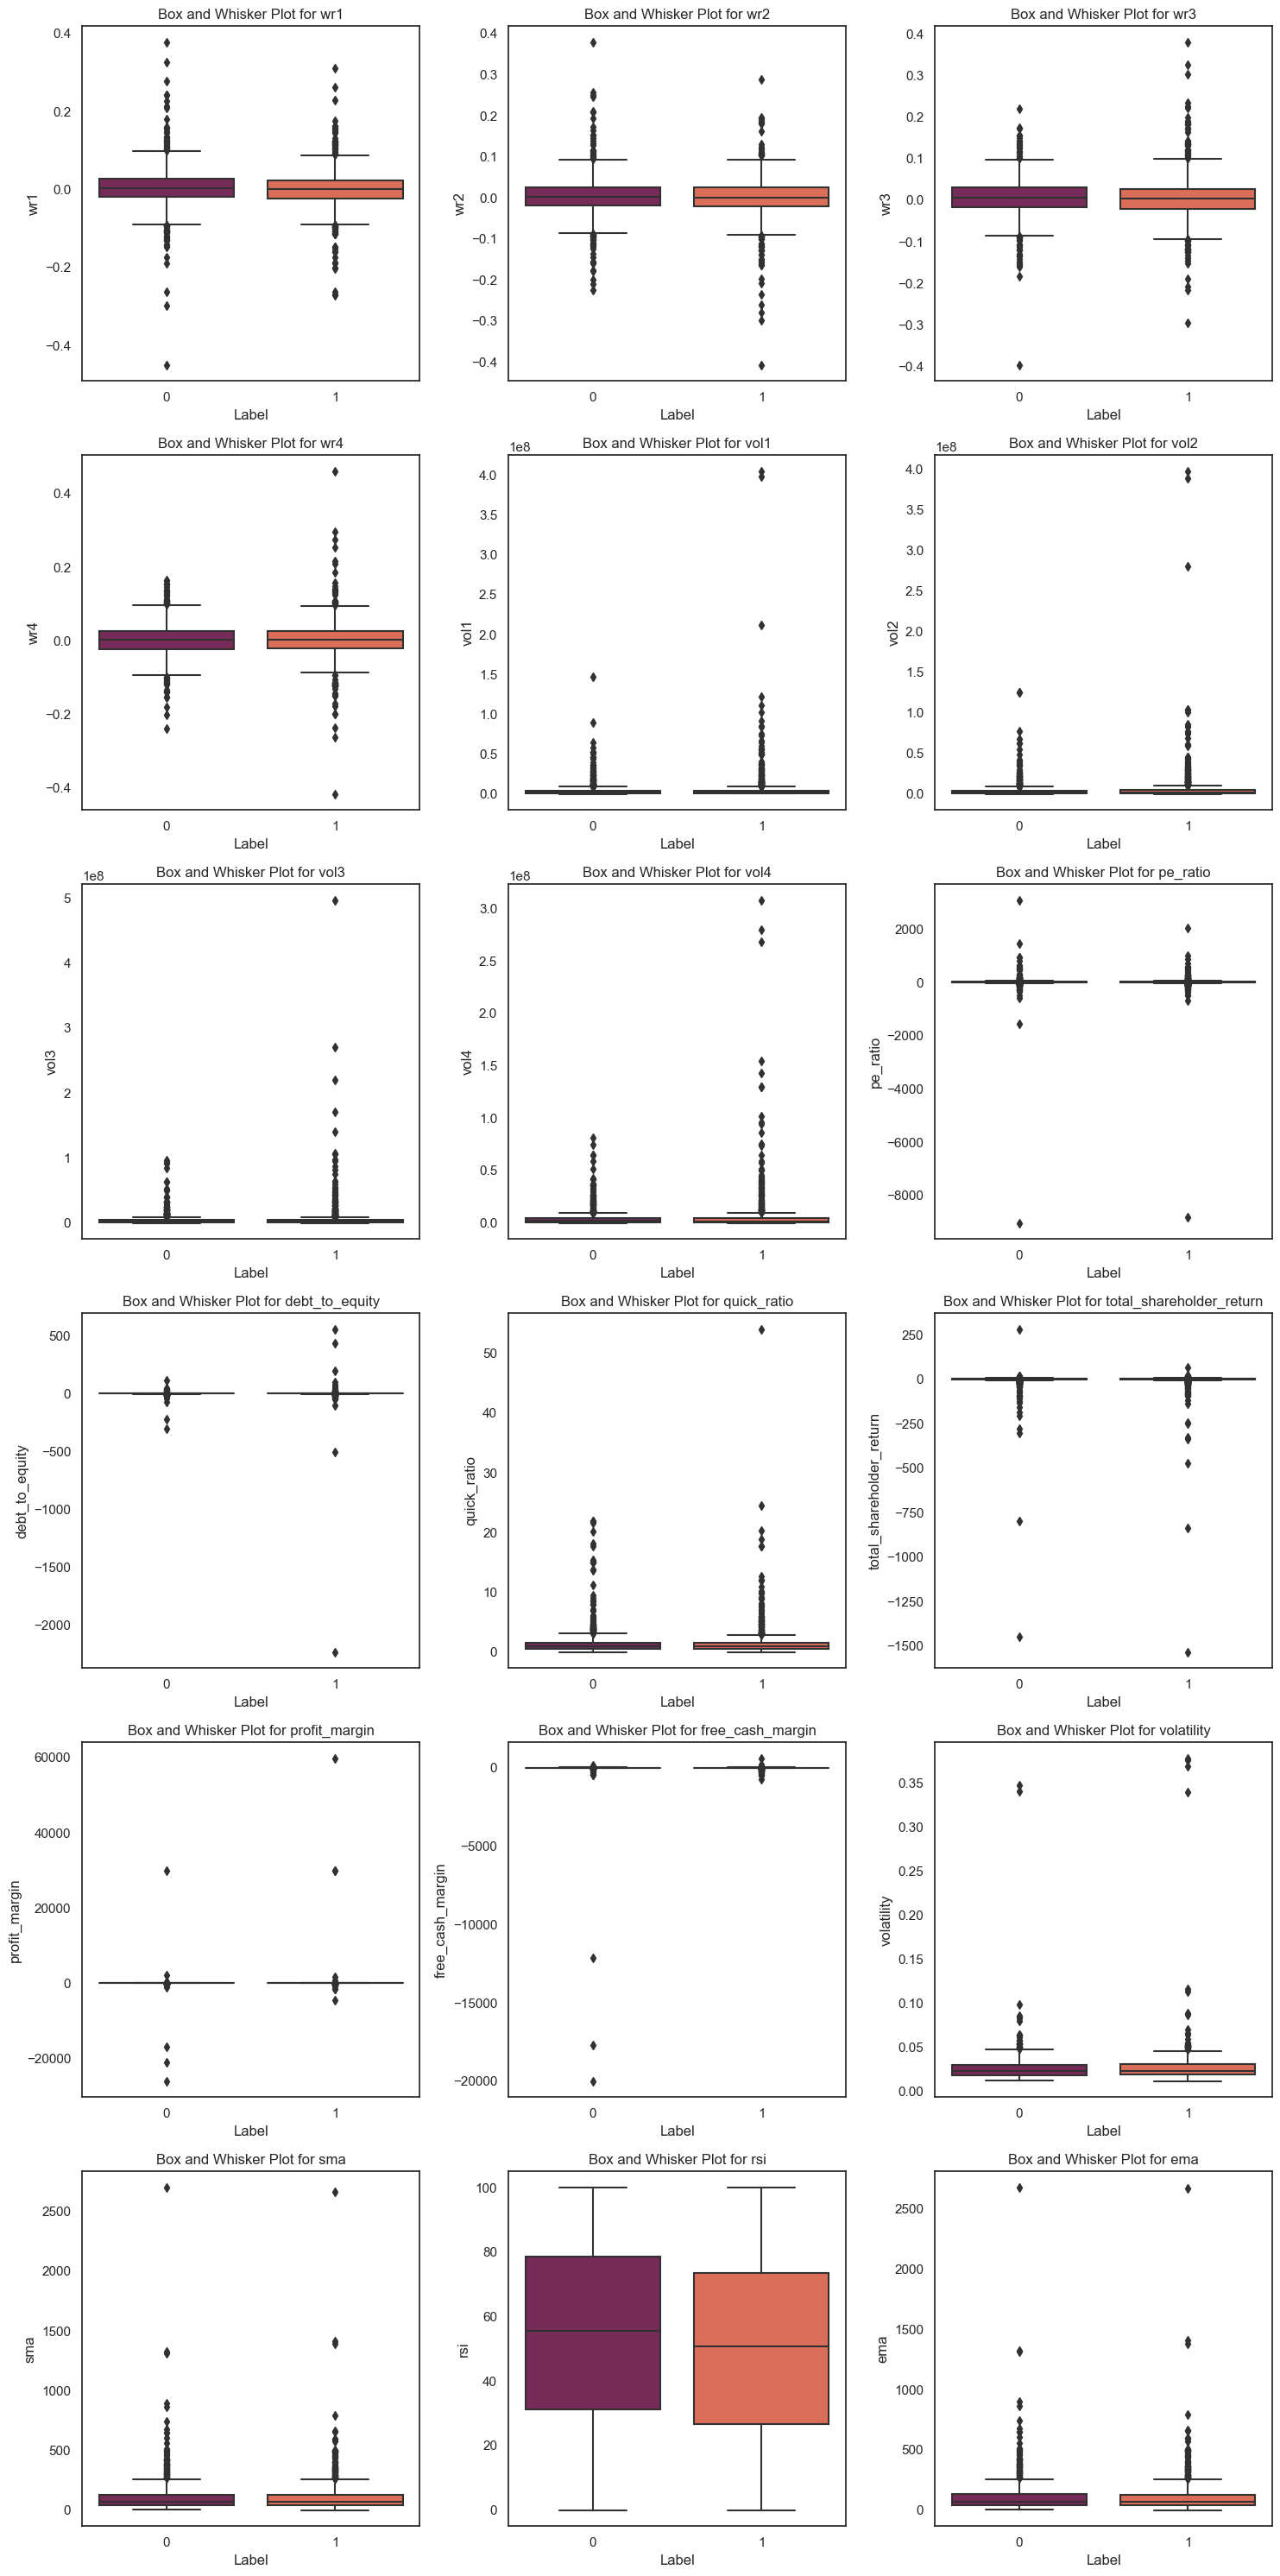

In [71]:
%matplotlib inline

# Assuming 'df' is your DataFrame
# If it's not already loaded, you should load your DataFrame here

# Select columns for the box plots
selected_columns = [col for col in df.columns if col not in ['industry', 'cpi', 'unemployment_rate', 'interest_rate', 'label']]

# Set the style for seaborn
sns.set(style="white")

# Create a box and whisker plot for each feature, separated by label
num_cols = 3
num_rows = -(-len(selected_columns) // num_cols)  # Ceiling division to get the number of rows

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(selected_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='label', y=feature, data=df, palette='rocket')
    plt.title(f'Box and Whisker Plot for {feature}')
    plt.xlabel('Label')
    plt.ylabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



Correlation Matrix for Numerical Columns:
                            wr1    wr2    wr3    wr4   vol1   vol2   vol3  \
wr1                       1.000 -0.002 -0.001  0.023 -0.028 -0.017 -0.048   
wr2                      -0.002  1.000 -0.012  0.006 -0.063 -0.055 -0.051   
wr3                      -0.001 -0.012  1.000 -0.121 -0.017 -0.015 -0.010   
wr4                       0.023  0.006 -0.121  1.000  0.034  0.029  0.028   
vol1                     -0.028 -0.063 -0.017  0.034  1.000  0.921  0.834   
vol2                     -0.017 -0.055 -0.015  0.029  0.921  1.000  0.917   
vol3                     -0.048 -0.051 -0.010  0.028  0.834  0.917  1.000   
vol4                     -0.067 -0.054 -0.008  0.027  0.838  0.848  0.912   
pe_ratio                  0.006  0.037  0.058 -0.011  0.001 -0.000  0.002   
debt_to_equity            0.018  0.007  0.022  0.022  0.006  0.005  0.002   
quick_ratio              -0.016  0.047 -0.012  0.038 -0.004 -0.005 -0.003   
total_shareholder_return -0.014 -0

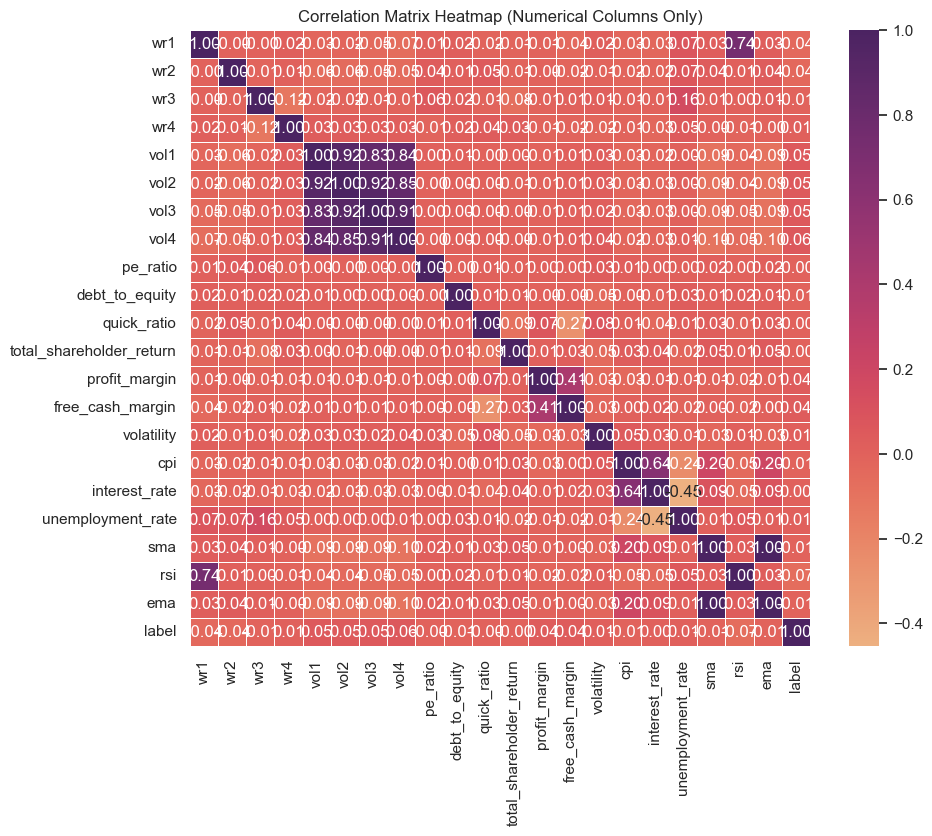

In [72]:
import pandas as pd
%matplotlib inline


# Assuming 'df' is your DataFrame
# If it's not already loaded, you should load your DataFrame here

# Select only numerical columns
numerical_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print("Correlation Matrix for Numerical Columns:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Numerical Columns Only)')
plt.show()


### Skewness

The following charts allow us to see the skewness and potential outliers of each feature

IndexError: index 10 is out of bounds for axis 0 with size 10

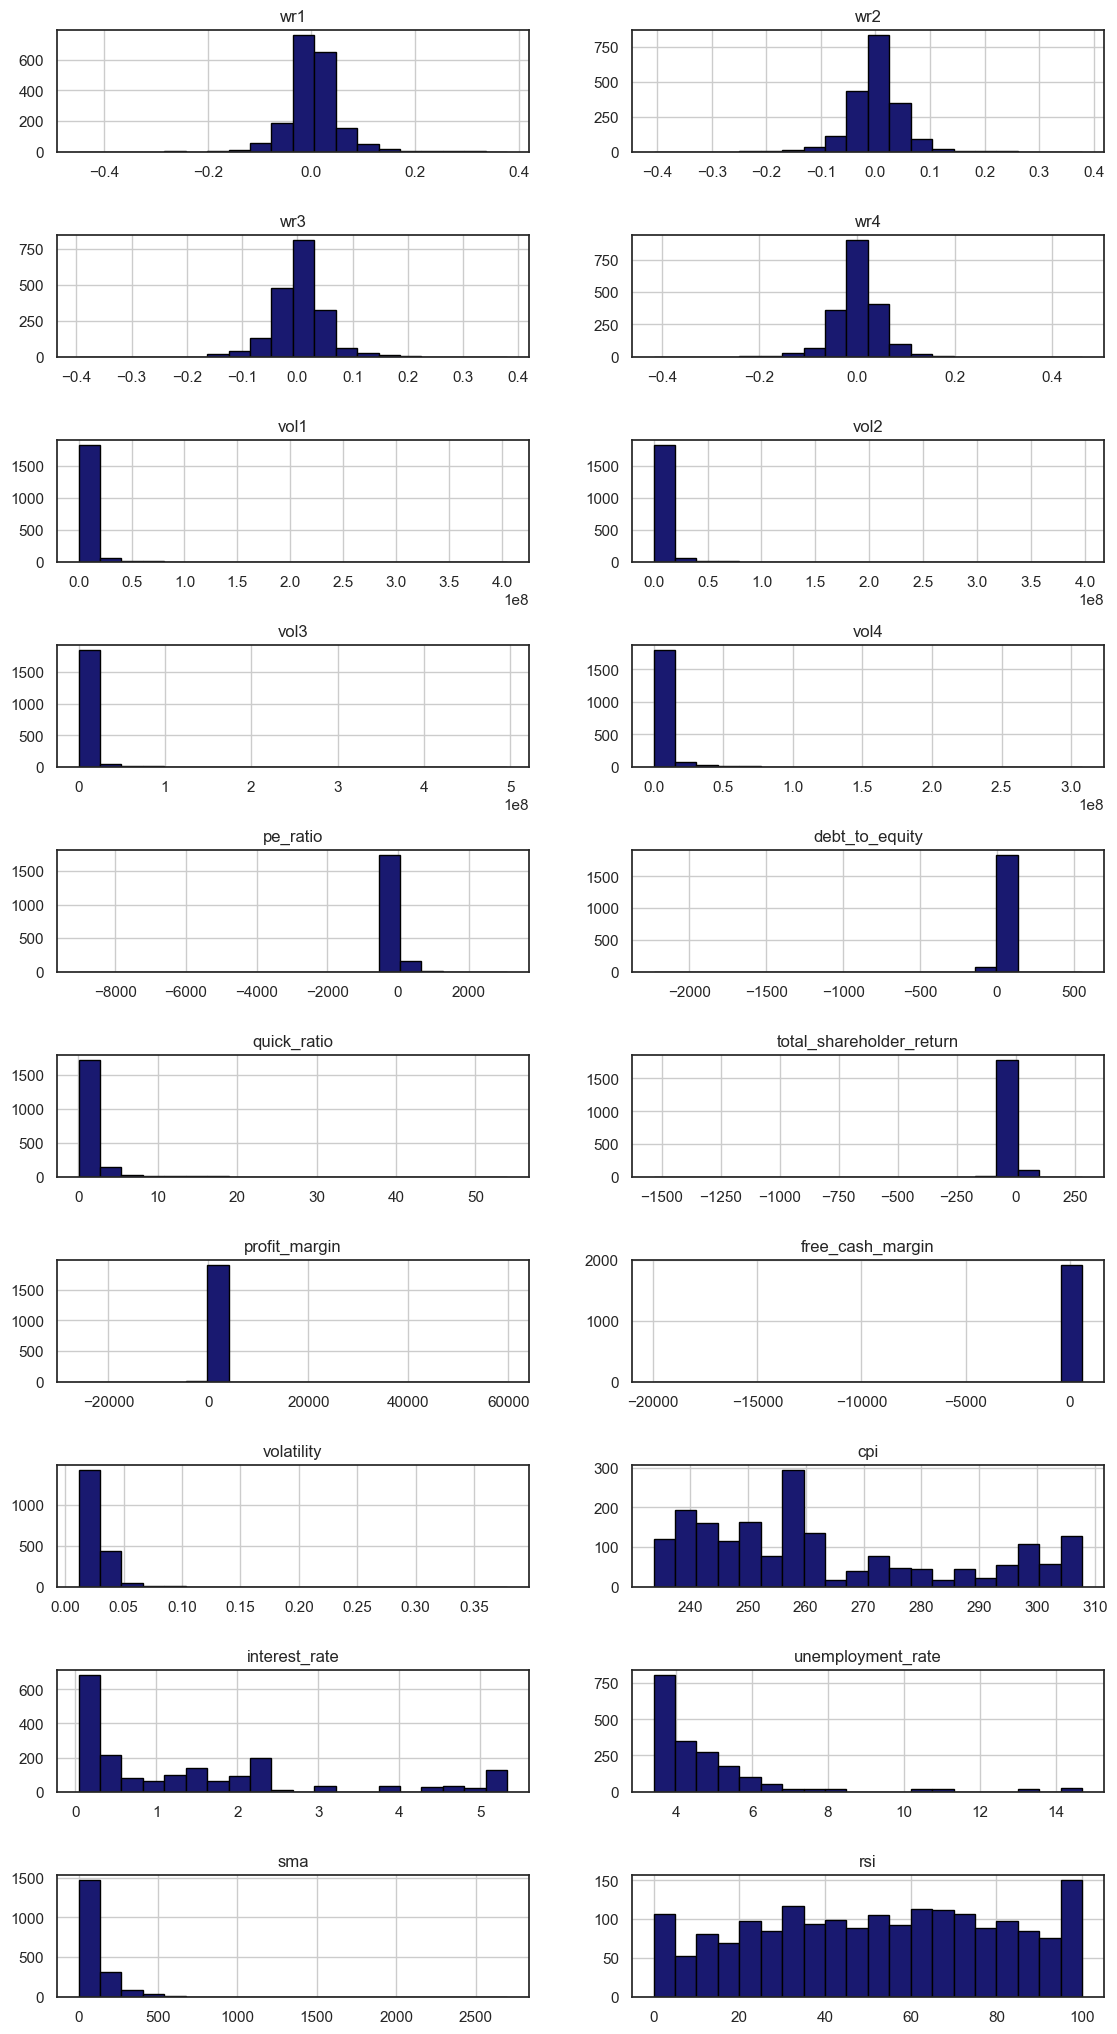

In [74]:
%matplotlib inline

columns_to_exclude = ["industry", "label"]
columns_to_plot = [col for col in df.columns if col not in columns_to_exclude]

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot)//2, ncols=2, figsize=(12, 2*len(columns_to_plot)//2))
fig.tight_layout(pad=3.0)

# Create histograms
for i, col in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    df[col].hist(ax=ax, bins=20, color='midnightblue', edgecolor='black')
    ax.set_title(col)

plt.show()
